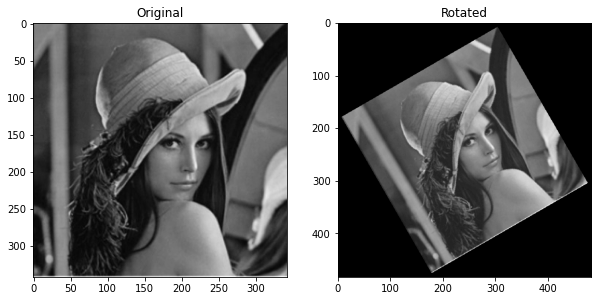

Time taken to rotate the image: 1.896013 seconds


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

start_time = time.time()

# 이미지 읽기
src = cv2.imread("lenna.jpg", 0)  # '0'은 이미지를 흑백으로 읽음을 의미

# 회전 각도와 라디안 계산
degree = 30
radian = np.radians(degree)

# 입력 이미지의 높이와 너비
H, W = src.shape[:2]

# 회전에 따라 필요한 새 이미지의 크기 계산
diagonal = int(np.sqrt(H**2 + W**2))  # 대각선 길이 계산
dst = np.zeros((diagonal, diagonal), dtype=np.uint8)  # 회전된 이미지가 들어갈 새 배열

# 새 이미지의 높이와 너비
H_new, W_new = dst.shape[:2]

# 회전 축 (중심) 계산
cx, cy = W // 2, H // 2  # 원본 이미지의 중심
cx_new, cy_new = W_new // 2, H_new // 2  # 새 이미지의 중심

# 각 픽셀에 대해
for h in range(H_new):
    for w in range(W_new):
        # 새 이미지에서의 좌표를 원본 이미지의 좌표계로 변환
        x = (w - cx_new)
        y = (h - cy_new)
        
        # 회전된 위치 계산
        x_src = int(x * np.cos(radian) - y * np.sin(radian) + cx)
        y_src = int(x * np.sin(radian) + y * np.cos(radian) + cy)
        
        # 원본 이미지의 경계 내에 있는지 확인
        if 0 <= x_src < W and 0 <= y_src < H:
            dst[h, w] = src[y_src, x_src]
        else:
            dst[h, w] = 0  # 경계 밖 픽셀은 검은색으로 처리

# 결과 표시
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(src, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(dst, cmap='gray')
axes[1].set_title('Rotated')
plt.show()
end_time = time.time()
print(f"Time taken to rotate the image: {end_time - start_time:.6f} seconds")

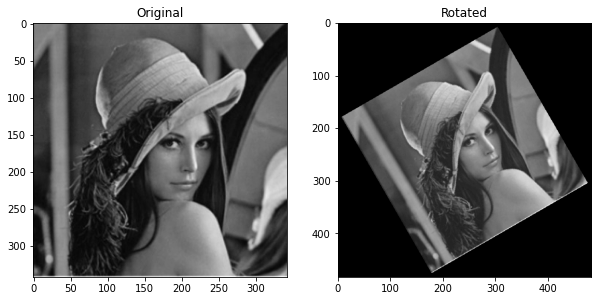

Time taken to rotate the image: 0.243010 seconds


In [3]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

start_time = time.time()
src = cv2.imread("lenna.jpg", 0)

def rotate_image(src, degree):
    radian = np.radians(degree)
    cos_angle, sin_angle = np.cos(radian), np.sin(radian)
    
    # Original image dimensions
    h, w = src.shape
    
    # Calculate new image dimensions
    diagonal = int(np.sqrt(h**2 + w**2))
    new_h, new_w = diagonal, diagonal
    
    # Output image
    dst = np.zeros((new_h, new_w), dtype=src.dtype)
    
    # Center of the image
    cx, cy = w // 2, h // 2
    cx_new, cy_new = new_w // 2, new_h // 2
    
    # Create a grid of indices
    x_new, y_new = np.meshgrid(np.arange(new_w), np.arange(new_h))
    
    # Shift grid to have center at the origin
    x_new -= cx_new
    y_new -= cy_new
    
    # Apply rotation
    x_old = cos_angle * x_new + sin_angle * y_new
    y_old = -sin_angle * x_new + cos_angle * y_new
    
    # Shift back to original image coordinates
    x_old += cx
    y_old += cy
    
    # Interpolation indices must be within the image boundaries
    x_old = np.clip(x_old, 0, w-1).astype(np.int32)
    y_old = np.clip(y_old, 0, h-1).astype(np.int32)
    
    # Map coordinates back to original image
    dst = src[y_old, x_old]

    return dst

rotate_image(src,30)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].imshow(src, cmap='gray')
axes[0].set_title('Original')
axes[1].imshow(dst, cmap='gray')
axes[1].set_title('Rotated')
plt.show()
end_time = time.time()
print(f"Time taken to rotate the image: {end_time - start_time:.6f} seconds")